In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# SVM

In [ ]:
#Reading CSV File
svmData = pd.read_csv('1 dataset-SVM.csv')

In [ ]:
#Checking data's column
print('SVM Data Column : ')
print(svmData.keys())

SVM Data Column : 
Index(['age', 'income', 'label'], dtype='object')


In [ ]:
#Checking Null Values
print('SVM Data : ', svmData.isnull().sum())

#No Null values within the datasets

SVM Data :  age       0
income    0
label     0
dtype: int64


<ipython-input-5-1f7ed451a4fa>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(svmData.income)


<Axes: xlabel='income', ylabel='Density'>

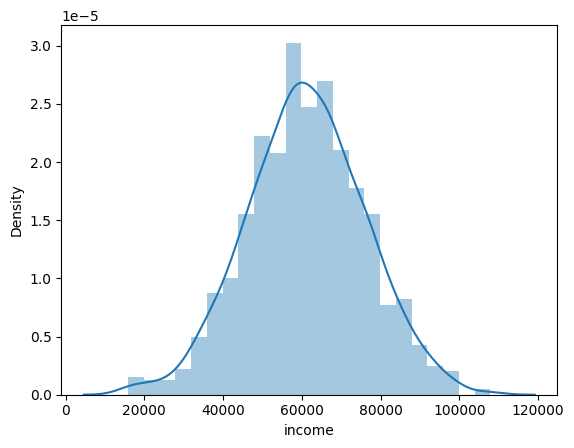

In [ ]:
#Check for normally distributed data
# sns.distplot(svmData.age)
sns.distplot(svmData.income)

<Axes: >

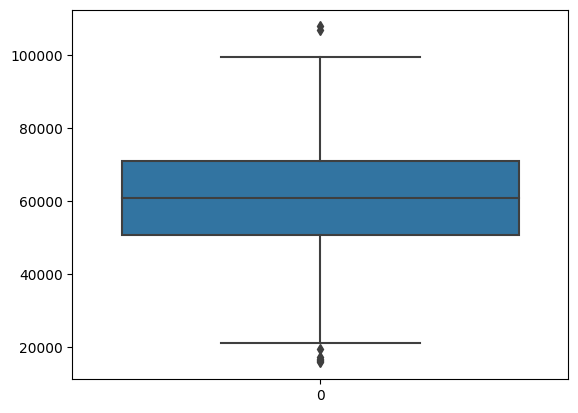

In [ ]:
#Checking Outliers
#SVM Data
#sns.boxplot(svmData.age)
sns.boxplot(svmData.income)

In [ ]:
#Removing Outliers with Z-Score
print('Length of Data before removing outliers : ', len(svmData))

#Age
upperLimit = svmData.age.mean() + 3 * svmData.age.std()
lowerLimit = svmData.age.mean() - 3 * svmData.age.std()

svmDataNew = svmData[(svmData.age < upperLimit) & (svmData.age > lowerLimit)]

#Income
upperLimit = svmData.income.mean() + 3 * svmData.income.std()
lowerLimit = svmData.income.mean() - 3 * svmData.income.std()

svmDataNew = svmData[(svmData.income < upperLimit) & (svmData.income > lowerLimit)]

print('Length of Data after removing outliers : ', len(svmDataNew))

#Ranging the Data based on the distribution plot
svmDataNew2 = svmData[(svmData.age >= 20) & (svmData.age <= 60)]
svmDataNew2 = svmData[(svmData.income >= 20000) & (svmData.income <= 100000)]
print('Length of Data after ranging the data based on the distribution plot : ', len(svmDataNew2))

Length of Data before removing outliers :  1000
Length of Data after removing outliers :  997
Length of Data after ranging the data based on the distribution plot :  992


In [ ]:
#Transforming categorical data
labEncoder = LabelEncoder()
svmData.label = labEncoder.fit_transform(svmData.label)
svmDataNew.label = labEncoder.fit_transform(svmDataNew.label)
svmDataNew2.label = labEncoder.fit_transform(svmDataNew2.label)

<ipython-input-8-e17d6a46e815>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svmDataNew.label = labEncoder.fit_transform(svmDataNew.label)
<ipython-input-8-e17d6a46e815>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  svmDataNew2.label = labEncoder.fit_transform(svmDataNew2.label)


In [ ]:
#Separating dependent and independent data for training
#Raw Data
x = svmData[['age', 'income']]
y = svmData.label

#Z-Score Data
xNew = svmDataNew[['age', 'income']]
yNew = svmDataNew.label

#Distribution Range Data
xNew2 = svmDataNew2[['age', 'income']]
yNew2 = svmDataNew2.label

In [ ]:
#Training
#Raw Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

#Removed Outliers with Z-Score
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(xNew, yNew, test_size=0.2, random_state=10)

#Scaling by range of distribution of data
x_train_new2, x_test_new2, y_train_new2, y_test_new2 = train_test_split(xNew2, yNew2, test_size=0.2, random_state=10)

# Number 1
a. When it comes to SVM, data scaling is indeed essentials. By doing data scaling, we can remove any unwanted outliers in a features making the model to train the data effectively since the distribution of the data will be neat as well.

b. As we can see, we apply the SVC on the raw data and it shows us an accuracy of 63.5%

c. For scaling the data, we first do a method of removing the outliers with a z-score. By counting the upperLimit and lowerLimit of each features, we can managed to remove any outliers within the data. With this method being applied, we can increase the accuracy up to 69.5%. The second method is to, find the range where the data is mostly distributed and scale the features to only those range. As we can see from the distribution plot above, the age range is mostly distributed on 20 - 60 while the income range is mostly distributed on 20000 - 100000. With this method being applied, we can then increased the accuracy of the model more up to 71.85%. Last but not least, by using a StandardScaler() method on the raw data, we can manage to increase the model accuracy up to 96.5%.

d. Even though scaling of data can indeed increased the accuracy of our model, there might be a trade-off as well when it comes to this method. By scaling off the data, there's a possibility that we remove essential datas that can surprisingly improve our model accuracy (datas that can help our model identifying the underlying pattern). However, if the distribution of the data is already neat or well-distributed or even there's even no outliers within the data, scaling off the data would not be necessary.

In [ ]:
#Raw Data
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

print('Accuracy Score Raw Data: ', metrics.accuracy_score(y_test, y_pred))

#Removed outliers data
svc.fit(x_train_new, y_train_new)
y_pred_new = svc.predict(x_test_new)

print('Accuracy Score Removed Outliers: ', metrics.accuracy_score(y_test_new, y_pred_new))

#Ranging Data with Distribution Plot
svc.fit(x_train_new2, y_train_new2)
y_pred_new2 = svc.predict(x_test_new2)
print('Accuracy Score Ranging Data: ', metrics.accuracy_score(y_test_new2, y_pred_new2))

#Using Standard Scaler
svc = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc.fit(x_train, y_train)
y_pred_new3 = svc.predict(x_test)
print('Accuracy Score Standard Scaler: ', metrics.accuracy_score(y_test, y_pred_new3))

Accuracy Score Raw Data:  0.635
Accuracy Score Removed Outliers:  0.695
Accuracy Score Ranging Data:  0.7185929648241206
Accuracy Score Standard Scaler:  0.965


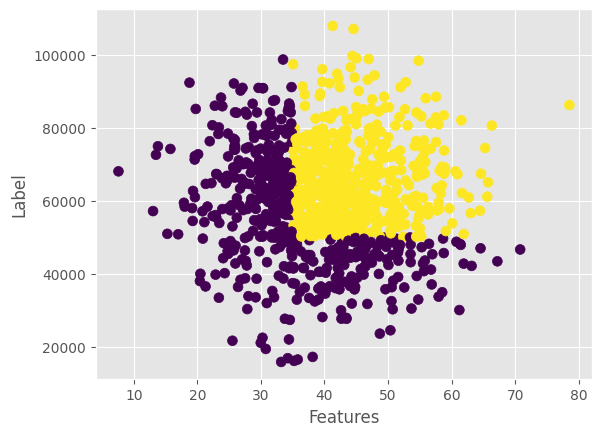

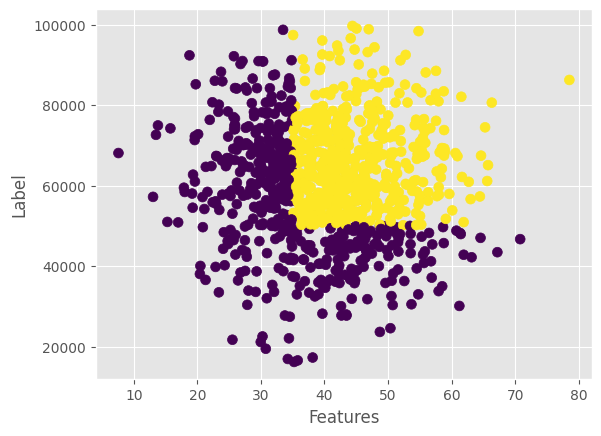

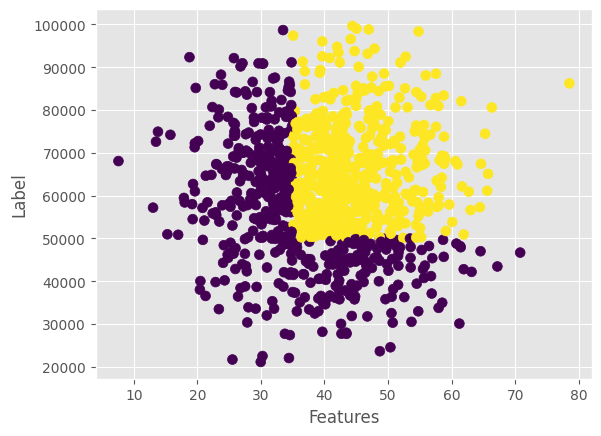

In [ ]:
#Plotting
#Raw Data
with plt.style.context('ggplot'):
  plt.scatter(x.age, x.income, c=y, marker='o', s=50)
  plt.xlabel('Features')
  plt.ylabel('Label')
  plt.show()

#Z-Score Outlier Removed Data
with plt.style.context('ggplot'):
  plt.scatter(xNew.age, xNew.income, c=yNew, marker='o', s=50)
  plt.xlabel('Features')
  plt.ylabel('Label')
  plt.show()

#Ranging by Distribution Plot Data
with plt.style.context('ggplot'):
  plt.scatter(xNew2.age, xNew2.income, c=yNew2, marker='o', s=50)
  plt.xlabel('Features')
  plt.ylabel('Label')
  plt.show()

# DECISION TREE

In [ ]:
#Reading CSV Files
dtData = pd.read_csv('2 dataset-DT.csv')

In [ ]:
#Checking Data's Column
print('DT Data Column : ')
print(dtData.keys())

DT Data Column : 
Index(['Age', 'Gender', 'Purchase History', 'Satisfaction Rating',
       'Repeat Purchase'],
      dtype='object')


In [ ]:
#Checking Null Values
print('DT Data : ', dtData.isnull().sum())
#No Null Values within the datasets

DT Data :  Age                    0
Gender                 0
Purchase History       0
Satisfaction Rating    0
Repeat Purchase        0
dtype: int64


<ipython-input-16-49b66e7f9704>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dtData['Repeat Purchase'])


<Axes: xlabel='Repeat Purchase', ylabel='Density'>

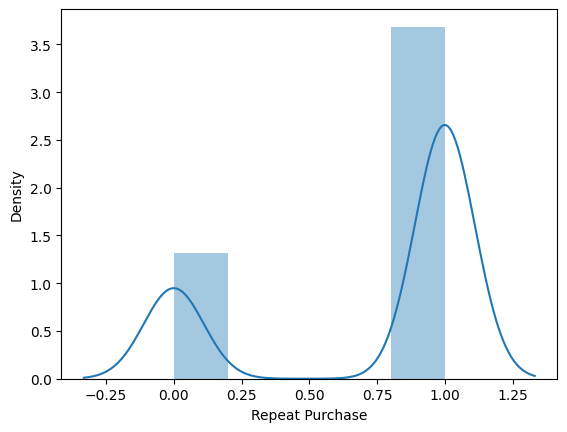

In [ ]:
#Check for normally distributed data
# sns.distplot(dtData.Age)
# sns.distplot(dtData.Gender)
# sns.distplot(dtData['Purchase History'])
# sns.distplot(dtData['Satisfaction Rating'])
sns.distplot(dtData['Repeat Purchase'])

In [ ]:
#Checking for Outliers
# sns.boxplot(dtData.Age)
# sns.boxplot(dtData.Gender)
# sns.boxplot(dtData['Purchase History'])
# sns.boxplot(dtData['Satisfaction Rating'])
# sns.boxplot(dtData['Repeat Purchase'])

# Based on the boxplot, there are no outliers within all columns of the data

In [ ]:
#Tranforming categorical Data
dtData.head(50)
#As we can see, all of the categorical data has been transformed to integer so label encoder is no longer needed

,Age,Gender,Purchase History,Satisfaction Rating,Repeat Purchase
0,56,0,0,1,1
1,46,1,1,1,1
2,32,0,1,5,0
3,60,1,1,5,1
4,25,0,0,2,1
5,38,0,1,5,0
6,56,1,1,2,1
7,36,1,1,4,1
8,40,1,1,1,1
9,28,1,0,4,0


In [ ]:
#Separating dependent and independent variabels
x = dtData[['Age', 'Gender', 'Purchase History', 'Satisfaction Rating']]
y = dtData['Repeat Purchase']

In [ ]:
#Training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Number 2
a.  In this case, I will be using the Decision Tree Classifier instead of Decision Tree Regressor. Reasons behind this choice is due to the fact that the prediction / the target variable of the model is repeat purchase, which is a binary integer (0 or 1). I assume this is a Yes or No values. Hence, we can apply the Decision Tree Classifier in this case because this model is used to classify categorical target variable while Decision Tree Regressor is used for a double / float target variable.

b. For the pruning process, I use the max depth of the tree = 4. With this being applied, it can enhance the model accuracy from 61% (Pre-Pruning) to 74.5% (Post-Pruning)

c. As we know, the default setting of a Decision Tree Classifier model will allow the tree to fully grown (unpruned). This fully grown tree can be very large and complex when it comes to certain dataset. This can lead to overfitting due to the complexity of the tree. Besides that, fully grown tree can also increase memory consumption leading to unefficient and uneffective model. By implementing pruning, we can limit the size of the tree produced by the model, leading to not over-complexed tree. This can help the model to predict and find the underlying pattern with efficient memory consumption.

d. By specifiying the alpha value parameter, we can achieve Minimal Cost-Complexity Pruning. This can help with dealing a overfit model due to the fact that alpha value is the complexity parameter that is used in order to define tree's cost complexity measure.

e. Applying different alpha values to the model did not give any significant enhancement in the model accuracy. However, I find the best pruning parameter of a max_depth = 4 and ccp_alpha = 0.5 that increased the model accuracy from  60.5% to 74.5%. Besides that, with this parameter being applied, MAE Score and MSE Score of Pre-Pruning : 0.395 can be pressed and decreased into 0.255.

In [ ]:
#Decision Tree Classifier

#Pre Pruning
dtc = DecisionTreeClassifier()

dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

print('Accuracy Score Pre-Pruning : ', metrics.accuracy_score(y_test, y_pred))
print('MAE Score Pre-Pruning : ', metrics.mean_absolute_error(y_test, y_pred), 'MSE Score Pre-Pruning : ', metrics.mean_squared_error(y_test, y_pred))

#Post Pruning
dtc = DecisionTreeClassifier(random_state=0, max_depth=4, ccp_alpha=0.5)

dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)

print('Accuracy Score Post-Pruning : ', metrics.accuracy_score(y_test, y_pred))
print('MAE Score Post-Pruning : ', metrics.mean_absolute_error(y_test, y_pred), 'MSE Score Post-Pruning : ', metrics.mean_squared_error(y_test, y_pred))

Accuracy Score Pre-Pruning :  0.615
MAE Score Pre-Pruning :  0.385 MSE Score Pre-Pruning :  0.385
Accuracy Score Post-Pruning :  0.745
MAE Score Post-Pruning :  0.255 MSE Score Post-Pruning :  0.255


[Text(0.5, 0.5, 'gini = 0.39\nsamples = 800\nvalue = [212, 588]')]

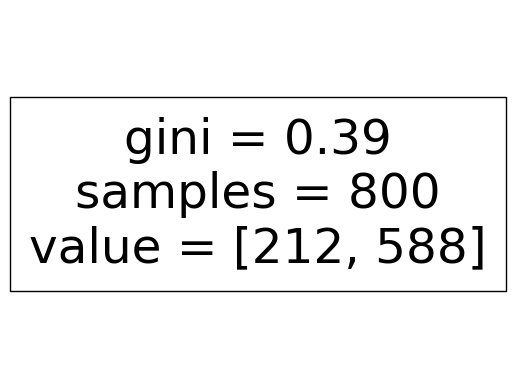

In [ ]:
#Plotting The Tree
plot_tree(dtc)

# DB SCAN and GMM

In [ ]:
#Reading CSV Files
dbgmmData = pd.read_csv('3 dataset-DBSCAN_GMM.csv')

In [ ]:
#Checking Data's Column
print('DB & GMM Data Column : ')
print(dbgmmData.keys())

DB & GMM Data Column : 
Index(['Purchase Frequency', 'Total Purchase Amount'], dtype='object')


In [ ]:
#Checking Null Values
print('DB & GMM Data : ', dbgmmData.isnull().sum())
#No Null Values within the datasets

DB & GMM Data :  Purchase Frequency       0
Total Purchase Amount    0
dtype: int64


<ipython-input-26-95189a45156f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dbgmmData['Total Purchase Amount'])


<Axes: xlabel='Total Purchase Amount', ylabel='Density'>

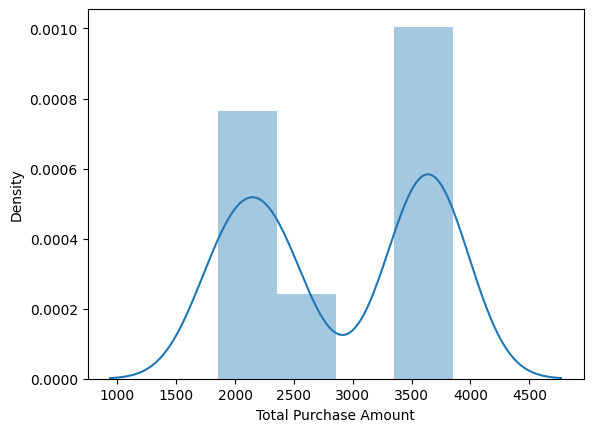

In [ ]:
#Check for normally distributed data
# sns.distplot(dbgmmData['Purchase Frequency'])
sns.distplot(dbgmmData['Total Purchase Amount'])

<Axes: >

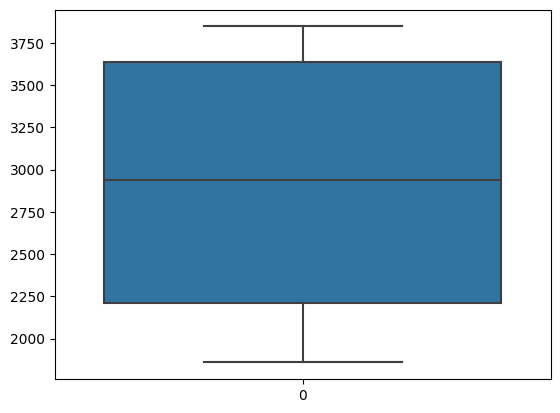

In [ ]:
#Checking for Outliers
# sns.boxplot(dbgmmData['Purchase Frequency'])
sns.boxplot(dbgmmData['Total Purchase Amount'])


# Based on the boxplot, there are no outliers within all columns of the data

In [ ]:
#Tranforming categorical Data
dbgmmData.head(50)
#As we can see, all of the data is in numerical data

,Purchase Frequency,Total Purchase Amount
0,18,2355.57
1,13,2287.33
2,19,2362.19
3,14,2375.87
4,14,2376.16
5,20,2397.93
6,18,2280.71
7,16,2281.10
8,11,2402.04
9,15,2350.22


In [ ]:
#Separating dependent and independent variabels
x = dbgmmData[['Purchase Frequency', 'Total Purchase Amount']]
y = dbgmmData['Total Purchase Amount']

In [ ]:
#Training
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

# Number 3

a. DBScan clusters consist of set of core samples that are close to each other and measured by a distance and set of non-core samples that are close to the core sample. There are two parameters when it comes to DBScan, eps and min_samples in which eps specify the distance of the neighbors of the core sample and min_samples specify the minimum samples of a cluster. When it comes to determining outliers in this algorithm, any sample that is not a core sample and lies within the eps distance from the core sample is considered an outlier.

b. GMM, on the other hand, is an algorithm that implements Expectation-Maximization(EM) algorithm for fitting the model. When a GMM model is train and test, it'll assign the Gaussian to each sample where it is most belong to using the fit_predict method. One of the parameter when it comes to this model is n_components parameter where it specifies the number of components or we can say clusters of the Gaussian will be.

c. When it comes to this scenario, we know that GMM is the fastest algorithms in terms of learning mixture models. Besides that, GMM maximizes only the likelihood and it will not bias the cluster sizes. However, GMM will always use all the components that it can acceess making it needing held-out data. Furthermore, estimating the covariance matrices will be difficult if one has insufficient many points per mixture and also it tends to find solutions with infinite likelihood. As for DBSCAN, this algorithm is much more flexible due to the fact that we can input the parameter of min_samples and eps that determine the specification of a cluster and outliers. However, this flexibility can lead to disaster if not handled properly. We can miscalculate the core sample as the outlier and vice versa if the parameter is not suitable.

d. When it comes to the DBSCAN, changing the min_samples and eps can result to different clusters produced and the density as well. As for the GMM, changing the n_components variable could affect the potential number of clusters. However, due to the fact that GMM is not biased to the clusters size, this event may not occur.\

e. For this dataset, it would be beneficial if there's an additional variable that is categorical that we can use for the y value. It's stated that we want to cluster based on purchase frequency and total purchase amount. By adding the additional variable, the x and y variable would not be using the same total purchase amount variable, instead the y variable can use the added categorical variable for more precise training.

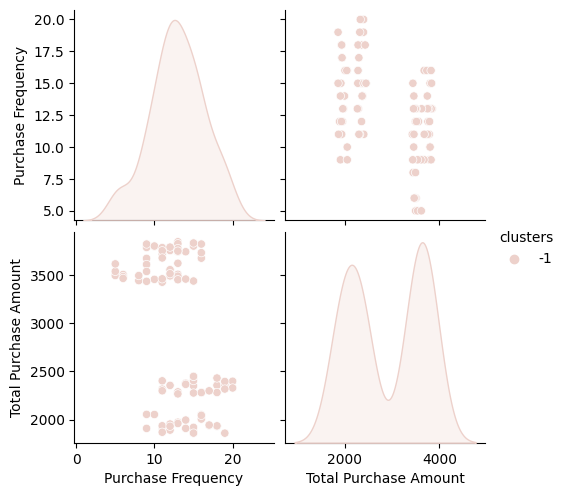

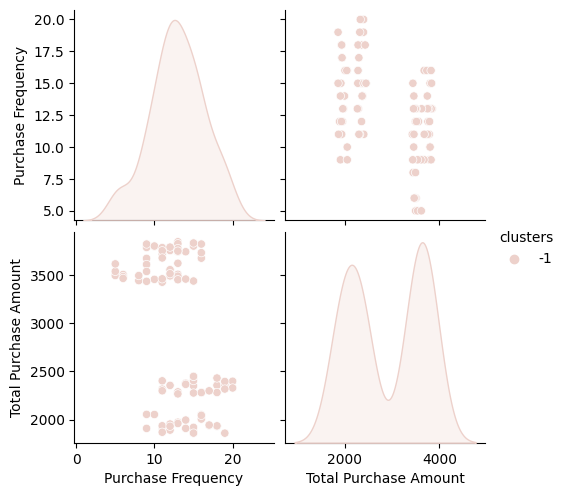

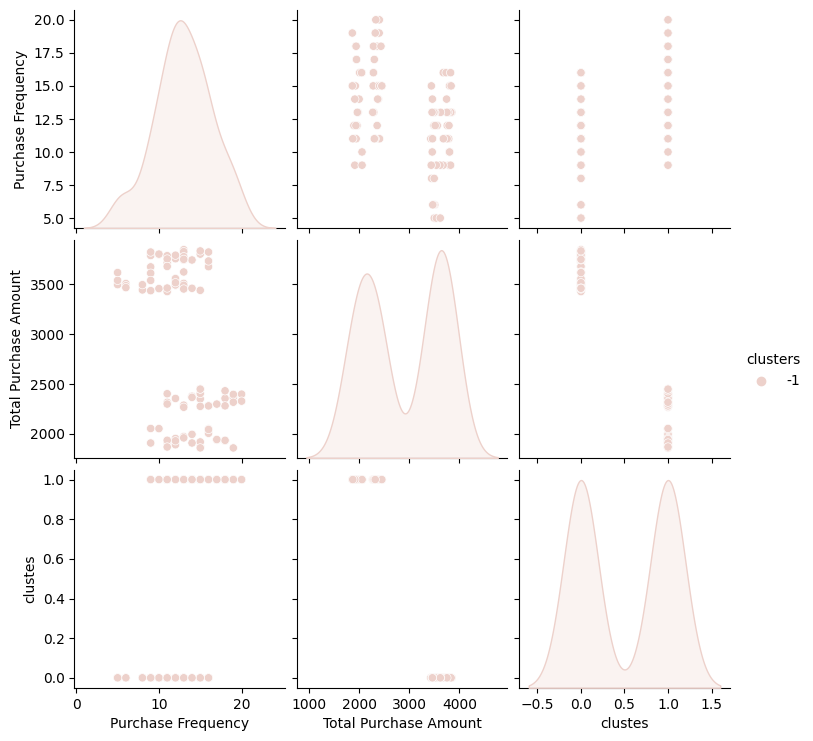

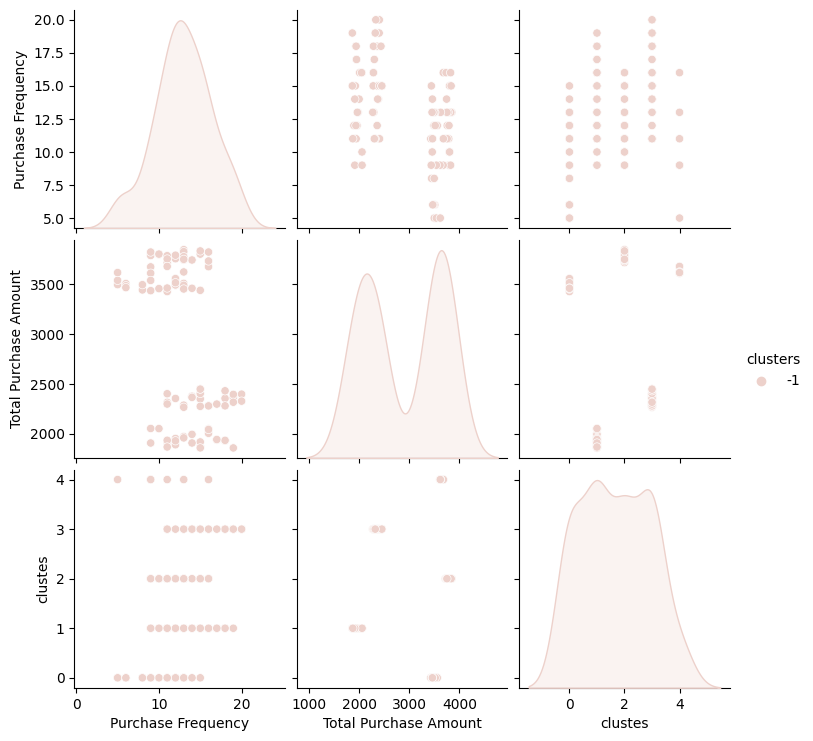

In [ ]:
#DBSCAN
dbScan = DBSCAN(eps=2, min_samples=8)
y_pred = dbScan.fit_predict(x)

x['clusters'] = y_pred

sns.pairplot(x, hue='clusters')

#Different Parameter
dbScan = DBSCAN(eps=1, min_samples=5)
y_pred = dbScan.fit_predict(x)

x['clusters'] = y_pred

sns.pairplot(x, hue='clusters')

#GMM
gmm = GaussianMixture(n_components = 2)
y_pred = gmm.fit_predict(x)
x['clustes'] = y_pred

sns.pairplot(x, hue='clusters')

#Different Parameter
gmm = GaussianMixture(n_components = 5)
y_pred = gmm.fit_predict(x)
x['clustes'] = y_pred

sns.pairplot(x, hue='clusters')

# Number 4

# Project Overview
a. As we know, Optical Character Recognition is a trending topic in terms of machine learning. Challenges that our team want to address is that we want to implement and enhance OCR with CNN and RNN algorithms to a dataset of cyrillic alphabet. This is a significant manner due to the fact that not all people is familiar with cyrillic alphabet and making a model with CNN and RNN would help a lot in terms of documenting texts, etc.

b. Our specific goals to this project is that we can optimize the CNN algorithm, which is widely known best suitable for image recognition and also RNN algorithm for recognizing the wide variety cyrillic alphabet. Besides that, we want to know wether CNN can hold its title as the best algorithm for image recognition or not.

# Methodology and Results
a. In dealing this problem, we are using a dataset from kaggle which consists of variety cyrillic alphabet. With the implementation of CNN and RNN algorithms, we manage to code our model inside the kaggle website.

b. Results shown that clearly CNN outperform RNN and still hold its title due to the fact that RNN operates based on feedback loops, any output that has an exploding gradient can lead to uneffective input to the next layer. This shows us that CNN and RNN can be implemented in cyrillic alphabet OCR effectively. However, there's still slight misinterpretation in our model due to the fact that cyrillic alphabet has several variations for a certain alphabet. In this case, we have found a possible soution by using classification of the data before the training process in order to split the alphabet based on its variation.